## 4. Kaj pa če želimo zaposliti dve osebi

What criteria
is best if we want to hire two people and want to maximize the probability
of selecting the best two candidates? What criteria is best if we want to hire
two people and want to minimize the average rank probability of the selected
two candidates? What strategy is best if we can choose two people and we
are happy if one of them is the best?

In [109]:
import random
n = 100 # število kandidatk
m = 10000 #kolikokrat poženemo proces iskanja najbolšega partnerja

tabela_partnerjev = {}
for i in range(m):
    partnerji = list(range(1,n+1))
    random.shuffle(partnerji)
    tabela_partnerjev[i] = partnerji

In [110]:
def NajbolsaDvaPartnerja(partnerji, stop):
    """Funkcija, ki vrne izbrana partnerja izmed partnerjev, 
    če smo smo jih zavračali do stop partnerja. 
    Nato pa izbrali naslednja dva, ki sta bila boljša od vseh, ki smo jih videli v vzorcu."""
    # partnerji ... seznam partnerjev
    # stop ... kdaj nehamo zavračati vse partnerje 

    vzorec = partnerji[:stop] #vključno s stop
    poroka = partnerji[stop:]

    najbolši = 0 
    za_vedno = []

    for partner in vzorec:
        if (partner > najbolši):
            najbolši = partner
   
    for partner in poroka:
        if (partner > najbolši):
            za_vedno.append(partner)
        if len(za_vedno) == 2:
            break 
   
    return za_vedno

In [111]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        sez = NajbolsaDvaPartnerja(tabela_partnerjev[i], stop)
        if ((n-1 in sez) and (n in sez) ):
            vsotke[stop] += 1

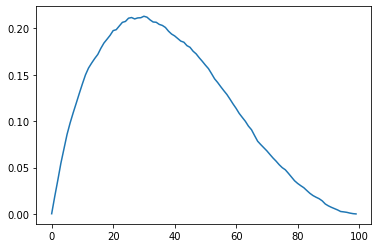

In [112]:
import matplotlib.pyplot as plt

verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

In [113]:
import numpy as np
np.argmax(vsotke)

30

Pričakovano je verjetnost, da s to metodo najdemo oba najbolša kandidata, manjša. Še vedno pa je relativno velika, verjetnost je pri ustavitvi pri 31 % okoli 22 %, kar me je dejansko presenetilo, saj sem mislil, da bo ta manjša.

Poleg tega vidimo, da se je vrh funkcije iz 36 premaknil na 31. Se pravi moramo prej nehati zavračati vse partnerje po vrsti in iskati pravega partnerja, kar je smiselno, saj moramo poiskati dva partnerja namesto enega. 

#### Zadovoljni smo, če smo dobili najbolšega

Ni nujno, da zaposlimo dva, ampak imamo to možnost. Hočemo pa samo zaposliti najbolšega. 

Predvidevamo, da bo verjetnost večja, kot če nimamo možnosti zaposliti dva kandidata inpredvidevamo, da bo maksimalna verjetnost sigurno manjša od 37. Predvidevamo pa da bo tudi manjša od 31, saj nam je za prvega vseeno.

In [114]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        sez = NajbolsaDvaPartnerja(tabela_partnerjev[i], stop)
        if (n in sez):
            vsotke[stop] += 1

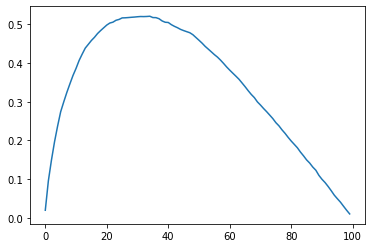

In [115]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

In [116]:
np.argmax(vsotke)

34

Verjetnost, da zaposlimo najbolšega kandidata, če se ustavimo pri 30 % kandidatov, je večja od polovice. 

### Metoda povprečja

V tem podrazdelku zgornje ugotovitve preverimoše na metodi povprečja.

In [132]:
def NajbolsaDvaPartnerja_povprecje(partnerji, stop, alfa):
    """Funkcija, ki vrne izbrana partnerja izmed partnerjev, 
    če smo smo jih zavračali do stop partnerja."""
    # partnerji ... seznam partnerjev
    # stop ... kdaj nehamo zavračati vse partnerje 
    # alpha ... faktor s katerim pomnožimo povprečje

    vzorec = partnerji[:stop] #vključno s stop
    dovolj_dober = np.mean(vzorec) * alfa

    poroka = partnerji[stop:]
    za_vedno = []
    
    for partner in poroka:
        if (partner >= dovolj_dober):
            za_vedno.append(partner)
            if len(za_vedno) == 2:
                break 

    return za_vedno

Najprej ugotovimo, kakšen alfa se nam najbolj splača vzeti. To bomo preverili tako, da bomo preverili, kako se obnaša funkcija, če spreminjamo alfa pri konstantnem stopu.

In [142]:
stop = 30

In [143]:
vsotke = [0] * 21
for al in range(180,201):
    alfa = al/100
    for i in range(m):
        sez = NajbolsaDvaPartnerja_povprecje(tabela_partnerjev[i], stop, alfa)
        if ((n in sez) and (n-1 in sez)):
            vsotke[al-180] += 1

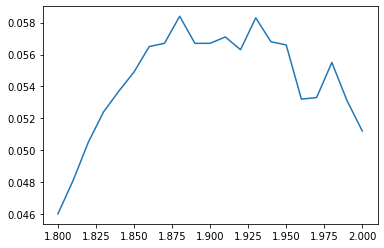

In [144]:
verjetnosti = [x / m for x in vsotke]
alfe = [i for i in np.arange(1.8, 2.01, 0.01)]

plt.plot(alfe, verjetnosti)
plt.show()

In [145]:
1.8 + np.argmax(vsotke)/100 

1.8800000000000001

Najbolj splača za alfa vzeti 1.85.

In [146]:
alfa = 1.85

In [148]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        sez = NajbolsaDvaPartnerja_povprecje(tabela_partnerjev[i], stop,alfa)
        if ((n in sez) and (n-1 in sez)):
            vsotke[stop] += 1

c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


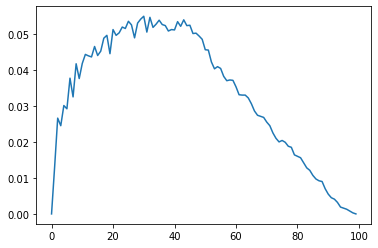

In [149]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

Opazimo, da so verjetnosti precej nižje kot pri standardni metodi. Kaj pa, če smo zadovoljni že, če zaposlimo najbolšega, za drugega pa nam je vseeno?

In [153]:
n = 100
m = 100

In [176]:
velike_vsote = []
for stop in range(n):
    vsotke = [0] * 21
    for al in range(180,201):
        alfa = al/100
        for i in range(m):
            sez = NajbolsaDvaPartnerja_povprecje(tabela_partnerjev[i], stop, alfa)
            if (n in sez):
                vsotke[al-180] += 1/n
    velike_vsote.append(vsotke)

c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [179]:
# from mpl_toolkits.mplot3d import Axes3D

def plot_wireframe(X, Y, Z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X, Y, Z, color='black')
    ax.set_title('Wireframe')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

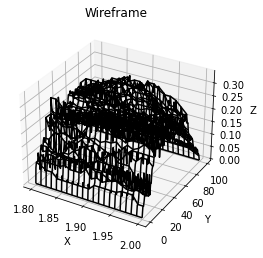

In [180]:
alfe = [i for i in np.arange(1.8, 2.01, 0.01)]
y = [i for i in range(n)]

alfe, y = np.meshgrid(alfe, y)
velike_vsote = np.array(velike_vsote)

plot_wireframe(alfe, y, velike_vsote)


In [192]:
sez = np.unravel_index(np.argmax(velike_vsote), velike_vsote.shape)
print("Maksimum dosežemo pri: n =", sez[0], " in alpha =", round(1.8 + sez[1]/100,2))

Maksimum dosežemo pri: n = 64  in alpha = 1.9


Zato poskus ponovimo pri dani alphi bolj natančno.

In [195]:
alfa = round(1.8 + sez[1]/100,2)
m = 10000

In [197]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        sez = NajbolsaDvaPartnerja_povprecje(tabela_partnerjev[i], stop,alfa)
        if (n in sez):
            vsotke[stop] += 1

c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


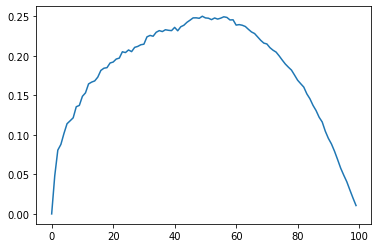

In [198]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

Ugotovitev je, da to ni dober postopek za iskanje najbolšega ali dveh najbolših oseb. Odnese se slabše kot navaden postopek iz teorije ustavljanja.